In [19]:
import pandas as pd
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
boston_data = load_boston()
X = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
y = pd.DataFrame(boston_data.target,columns=['y'])
y.head()

,y
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [10]:
X['RAD'].unique()

array([ 1.,  2.,  3.,  5.,  4.,  8.,  6.,  7., 24.])

In [11]:
X_Num = X.drop(labels=['CHAS','RAD'],axis=1)

The ratio of Arithmetic Mean to Geometric mean can be used as a dispersion measure. Higher dispersion implies a higher value of Ri, thus a more relevant feature. Conversely, when all the feature samples have (roughly) the same value, Ri is close to 1, indicating a low relevance feature.’ 

<BarContainer object of 11 artists>

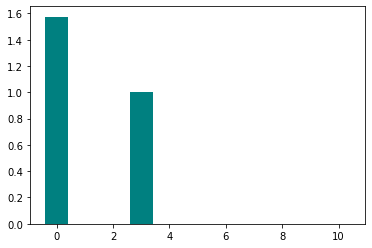

In [20]:

X_Num = X_Num+1 #to avoid 0 fro denominator

#arithmetic mean

am = np.mean(X_Num,axis=0)
am
#geometric mean
gm = np.power(np.prod(X_Num,axis=0),1/(X_Num.shape[0]))

dis_ratio = am/gm
plt.bar(np.arange(X_Num.shape[1]),dis_ratio,color='teal')

In [21]:
X_Num.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')

## Mean absolute diffrence

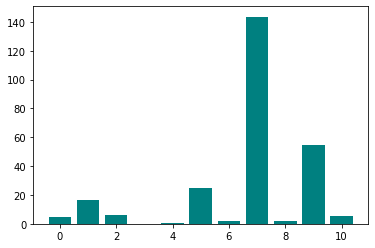

In [22]:
mean_abs_diff = np.sum(np.abs(X_Num - np.mean(X_Num,axis=0)),axis=0)/X_Num.shape[0]
plt.bar(np.arange(X_Num.shape[1]),mean_abs_diff,color = 'teal')
plt.show()